In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'planet-understanding-the-amazon-from-space:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F6322%2F868312%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240301%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240301T120225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D34c6fca93ebadabf45dbdbf232136b18d6c3fb810be6e7db5711ede54f68fb53a81479e790c686b1b523788b0a9bb3748669db79c6c8b19d2a54d4df048684986b4071576b08328c63c1d1e8d46fc9eda6afb3a78383dfe9e248e66fff60ef3066ad50b354503bceb3a8b2d250ab264ba7bc269307073e669ab83faf0c2d164b526f9fad7685d0edb14b507102ad01e0662bfc25788cb10025680e9f39ac22a307878a8754f42e587dbaf59391c453730111d578325321e1f2f5252db18bec25cb4e932ecae3f1013e5efe8c65cdf82fbd61a3d727c97f31ce893b478e267b8be377693cef08b23af7d7ef6c3edb68f5f7e39364f114ee9b078f3a5542388e6d,planets-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F503255%2F938046%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240301%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240301T120225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Daf0d9ba39d8b85a1a2d500baade83dfecbf20c0ce9b8f5b66eaad93cd39250f0c40b23993d38a28da7e3f5caef2086c3ce7b7444b06a3f5f6ef364f50511ba8b9f205f32467b88eb1a17cf2b7b67bde02bc012bd36dcf1965931e0c3817c2b9aa9cbd0333c7a4deb54c112d273ed1759b7ff87ec5a01118ce69bd6438fa0f808ea0b79eb781310d59bea6776ae94f7928829c6b919da709a123bb594cd6d3f6334b241ba9f0232b79fc0e63c6de74a61287081b3b971b0c68ef59abe81e55e5f751cccfc7e99d1a9652dc2a208a2c439a1b272ebea02414a9966e45074ad03325dd938239704347b46d89304a079aa950833a29906fa13e30ab0a949b7d584f2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3080605 bytes downloaded
Downloaded and uncompressed: planet-understanding-the-amazon-from-space
[==================================================] 1609474013 bytes downloaded
Downloaded and uncompressed: planets-dataset
Data source import complete.


# **Understanding the Amazon from Space**

# **Image Classification Using CNNs**

Every minute, the world loses an area of forest the size of 48 football fields. And deforestation in the Amazon Basin accounts for the largest share, contributing to reduced biodiversity, habitat loss, climate change, and other devastating effects. But better data about the location of deforestation and human encroachment on forests can help governments and local stakeholders respond more quickly and effectively.

In this notebook, I have used the dataset with jpg files to train the machine learning model for image classification. The Convolutional Neural Network (CNN) is used in order to classify the satellite images as it automatically detects the important features of the image without any supervision.

Here, I have used various Python libraries such as numpy, pandas, tensorflow, keras, etc to acquire the results we expecting from the dataset.

**Importing the libraries**

In [5]:
!pip install tensorflow --upgrade --quiet
!pip install keras --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


In [1]:
import os
import gc
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


from keras import ops
from keras import backend as K
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from sklearn.utils import shuffle

import cv2
from PIL import Image
from tensorflow.keras.models import Sequential

**Loading the datasets**

In [2]:
#reading the labels

train_label = pd.read_csv('../input/planets-dataset/planet/planet/train_classes.csv')
sam_sub = pd.read_csv('../input/planets-dataset/planet/planet/sample_submission.csv')
train_label.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [9]:
sam_sub

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water
...,...,...
61186,file_9995,primary clear agriculture road water
61187,file_9996,primary clear agriculture road water
61188,file_9997,primary clear agriculture road water
61189,file_9998,primary clear agriculture road water


In [5]:
#defining a dict of encoded labels

label_map = {'agriculture': 0,
 'artisinal_mine': 1,
 'bare_ground': 2,
 'blooming': 3,
 'blow_down': 4,
 'clear': 5,
 'cloudy': 6,
 'conventional_mine': 7,
 'cultivation': 8,
 'habitation': 9,
 'haze': 10,
 'partly_cloudy': 11,
 'primary': 12,
 'road': 13,
 'selective_logging': 14,
 'slash_burn': 15,
 'water': 16}


In [11]:
#loading the traing_images

X = []
Y = []
train_label = shuffle(train_label,random_state=0)

x_test = []
y_test = []

In [17]:
for image_name, tags in tqdm(train_label.values, miniters=400):
    arr = cv2.imread('../input/planets-dataset/planet/planet/train-jpg/{}.jpg'.format(image_name), cv2.IMREAD_UNCHANGED)

    arr = arr / 255.0 #normalize the pixels from [0, 255] to [0, 1]
    targets = np.zeros(17)
    for t in tags.split(' '):
      targets[label_map[t]] = 1
    arr = cv2.resize(arr, (64, 64))
    X.append(arr)
    Y.append(targets)


In [6]:
#splitting

X = np.array(X, np.float16)
Y = np.array(Y)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(32383, 64, 64, 3) (32383, 17) (8096, 64, 64, 3) (8096, 17)


In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(x_val), np.arra(y_val)))

In [8]:
del X, Y, x_train, y_train, x_val, y_val
gc.collect()

24

**Define the model**

In [8]:
# !pip install -qq -U tensorflow-addons --quiet
# import tensorflow_addons as tfa

In [28]:
# DATA
BUFFER_SIZE = 512
BATCH_SIZE = 128

# AUGMENTATION
IMAGE_SIZE = 64
PATCH_SIZE = 8
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 2e-3
WEIGHT_DECAY = 0.0001
NUM_CLASSES = 17

# TRAINING
EPOCHS = 35

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 5
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [512, 256, 32]

In [24]:
from tensorflow.keras import layers

In [ ]:
class ShiftedPatchTokenization(layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vanilla = vanilla  # Flag to swtich to vanilla patch extractor
        self.image_size = image_size
        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = layers.Reshape((num_patches, -1))
        self.projection = layers.Dense(units=projection_dim)
        self.layer_norm = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def crop_shift_pad(self, images, mode):
        # Build the diagonally shifted images
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        # Crop the shifted images and pad them
        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size - self.half_patch,
            target_width=self.image_size - self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size,
            target_width=self.image_size,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            # Concat the shifted images with the original image
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1,
            )
        # Patchify the images and flatten it
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            # Layer normalize the flat patches and linearly project it
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            # Linearly project the flat patches
            tokens = self.projection(flat_patches)
        print(f"type tokens = {type(tokens)}, patches shape = {type(patches)}")
        return tokens, patches

In [27]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [28]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [29]:
# @keras.saving.register_keras_serializable()
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [30]:
def create_vit_classifier():
    inputs = keras.Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 3) )

    # Create patches.
    patches = Patches(PATCH_SIZE)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(NUM_PATCHES, PROJECTION_DIM)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.GlobalAveragePooling1D()(representation)
    representation = layers.Dropout(0.1)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.1)
    # Classify outputs.
    logits = layers.Dense(NUM_CLASSES, activation="sigmoid")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [39]:
# del model, optimizer, history
gc.collect()

14

In [40]:
model = create_vit_classifier()

In [41]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patches_2 (Patches)       │ (None, 64, 192)        │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_encoder_2           │ (None, 64, 64)         │         16,448 │ patches_2[0][0]        │
│ (PatchEncoder)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_20    │ (None, 64, 64)         │            128 │ patch_encoder_2[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 64, 64)         │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 64, 64)         │              0 │ multi_head_attention_… │
│                           │                        │                │ patch_encoder_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_21    │ (None, 64, 64)         │            128 │ add_18[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 64, 128)        │          8,320 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 64, 128)        │              0 │ dense_28[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 64, 64)         │          8,256 │ dropout_35[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_36 (Dropout)      │ (None, 64, 64)         │              0 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_19 (Add)              │ (None, 64, 64)         │              0 │ dropout_36[0][0],      │
│                           │                        │                │ add_18[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_22    │ (None, 64, 64)         │            128 │ add_19[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_10   │ (None, 64, 64)         │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 64, 64)         │              0 │ multi_head_attention_… │
│                      

 Total params: 605,969 (2.31 MB)

 Trainable params: 605,969 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
def fbeta_score(y_true, y_pred, beta=2.0, threshold=0.5):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > threshold, tf.float32)

    tp = tf.reduce_sum(y_true * y_pred, axis=1)
    fp = tf.reduce_sum(y_pred, axis=1) - tp
    fn = tf.reduce_sum(y_true, axis=1) - tp

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    beta_squared = beta ** 2
    fbeta = (1 + beta_squared) * precision * recall / (beta_squared * precision + recall + tf.keras.backend.epsilon())

    return fbeta

In [43]:

optimizer = keras.optimizers.AdamW(
    learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY
)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[
        fbeta_score
    ],
)


history = model.fit(
    train_dataset.batch(BATCH_SIZE),
    batch_size=BATCH_SIZE,
    validation_data =val_dataset.batch(64),
    epochs=EPOCHS,
)



Epoch 1/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 114s 235ms/step - fbeta_score: 0.6126 - loss: 0.2820 - val_fbeta_score: 0.6989 - val_loss: 0.2146
Epoch 2/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - fbeta_score: 0.7273 - loss: 0.1929 - val_fbeta_score: 0.7706 - val_loss: 0.1830
Epoch 3/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - fbeta_score: 0.7588 - loss: 0.1764 - val_fbeta_score: 0.7813 - val_loss: 0.1604
Epoch 4/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - fbeta_score: 0.7783 - loss: 0.1646 - val_fbeta_score: 0.8035 - val_loss: 0.1555
Epoch 5/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - fbeta_score: 0.7937 - loss: 0.1579 - val_fbeta_score: 0.8090 - val_loss: 0.1491
Epoch 6/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - fbeta_score: 0.8020 - loss: 0.1525 - val_fbeta_score: 0.8119 - val_loss: 0.1459
Epoch 7/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - fbeta_score: 0.8106 - loss: 0.1478 - val_fbeta_score: 0.8206 - val_loss: 0.1373
Epoch 8/35
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/s

In [26]:
model.save("Model.keras")

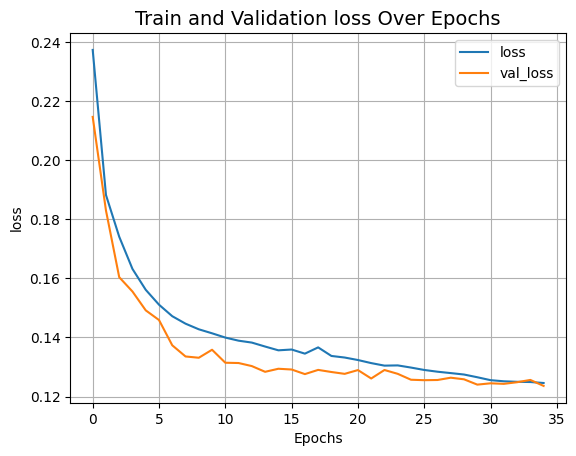

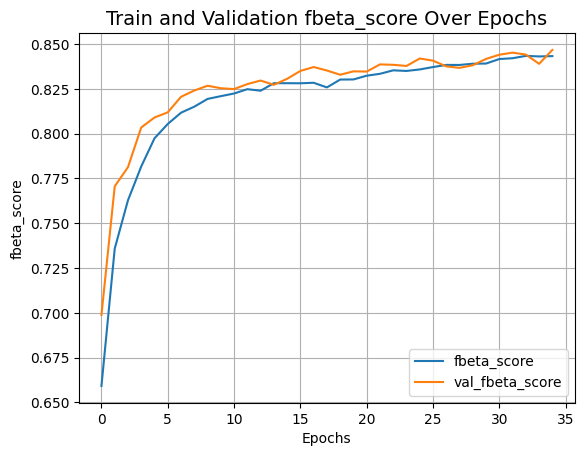

In [49]:


def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("fbeta_score")

## Creating its a simple distilled model

In [57]:
student = tf.keras.models.Sequential([
    layers.Input((64, 64, 3)),

    layers.Conv2D(256, 2, 2, activation='relu'),
    layers.MaxPooling2D(2),

    layers.GlobalAveragePooling2D(),
    Dense(32, activation='relu'),
    Dense(17, activation='sigmoid')

])

In [50]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):

        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def compute_loss(
        self, x=None, y=None, y_pred=None, sample_weight=None, allow_empty=False
    ):
        teacher_pred = self.teacher(x, training=False)
        student_loss = self.student_loss_fn(y, y_pred)

        distillation_loss = self.distillation_loss_fn(
            ops.softmax(teacher_pred / self.temperature, axis=1),
            ops.softmax(y_pred / self.temperature, axis=1),
        ) * (self.temperature**2)

        loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        return loss

    def call(self, x):
        return self.student(x)

In [58]:
distiller = Distiller(student=student, teacher=model)
distiller.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-3),
    metrics=[fbeta_score],
    student_loss_fn= tf.keras.losses.BinaryCrossentropy(),
    distillation_loss_fn= keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
distiller.fit(train_dataset.batch(64), epochs=3)


Epoch 1/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 45s 42ms/step - fbeta_score: 0.6369 - loss: 0.0434
Epoch 2/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - fbeta_score: 0.6341 - loss: 0.0229
Epoch 3/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - fbeta_score: 0.6486 - loss: 0.0222


In [59]:
distiller.summary()

Model: "distiller_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_5 (Functional)            │ ?                           │         605,969 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ ?                           │          12,113 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,854,248 (7.07 MB)

 Trainable params: 618,082 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,236,166 (4.72 MB)